In [ ]:
!pip install opendatasets

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [1]:
import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset/data')

ModuleNotFoundError: No module named 'opendatasets'

In [ ]:
df = pd.read_csv('/content/english-handwritten-characters-dataset/english.csv')
df

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0
...,...,...
3405,Img/img062-051.png,z
3406,Img/img062-052.png,z
3407,Img/img062-053.png,z
3408,Img/img062-054.png,z


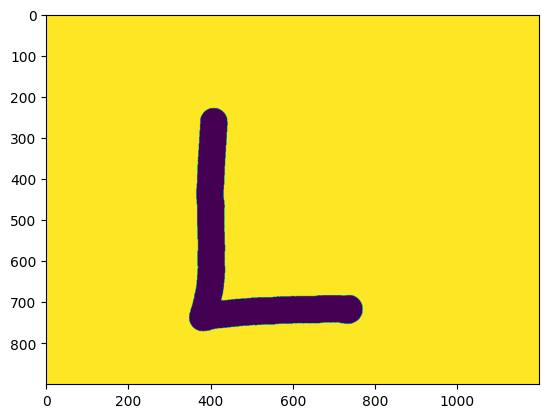

In [ ]:
img = cv2.imread('/content/english-handwritten-characters-dataset/Img/img022-025.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

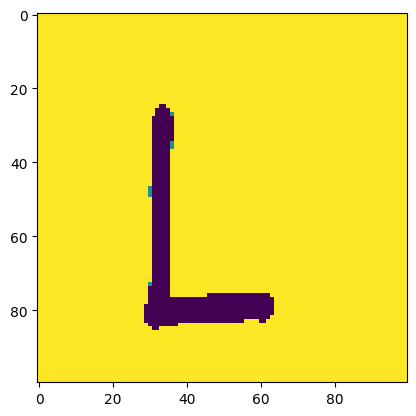

In [ ]:
img = cv2.resize(img,(100,100))
plt.imshow(img)

In [ ]:
img.shape

(100, 100)

In [ ]:
df['image'] = '/content/english-handwritten-characters-dataset/' + df['image']

In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['label']= label_encoder.fit_transform(df['label'])


In [ ]:
df

,image,label
0,/content/english-handwritten-characters-datase...,0
1,/content/english-handwritten-characters-datase...,0
2,/content/english-handwritten-characters-datase...,0
3,/content/english-handwritten-characters-datase...,0
4,/content/english-handwritten-characters-datase...,0
...,...,...
3405,/content/english-handwritten-characters-datase...,61
3406,/content/english-handwritten-characters-datase...,61
3407,/content/english-handwritten-characters-datase...,61
3408,/content/english-handwritten-characters-datase...,61


In [ ]:
images = []
labels = []

def imageLoad(row):
  path = row['image']
  img = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(100,100))
  images.append(img)
  labels.append(row['label'])


In [ ]:
df.apply(imageLoad,axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
3405    None
3406    None
3407    None
3408    None
3409    None
Length: 3410, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,labels , random_state=102,  test_size=0.20,  shuffle=True)

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)

# Reshape input data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
# Training the PLA model
pla_model = Perceptron(max_iter=100, eta0=0.1)
pla_model.fit(X_train, y_train)

# Predictions on test set
y_pred = pla_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.13636363636363635


In [ ]:
import tensorflow as tf

X_train = tf.convert_to_tensor(X_train)

X_test = tf.convert_to_tensor(X_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(100,100,1)))
model.add(layers.Dense(728,activation='relu'))
model.add(layers.Dense(500,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(60,activation='relu'))
model.add(layers.Dense(62,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 728)               7280728   
                                                                 
 dense_1 (Dense)             (None, 500)               364500    
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 60)                6060      
                                                                 
 dense_5 (Dense)             (None, 62)                3

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=150,
                    validation_data=(X_test, y_test))

Epoch 1/150
86/86 [==============================] - 3s 10ms/step - loss: 4.1416 - accuracy: 0.0202 - val_loss: 4.1454 - val_accuracy: 0.0059
Epoch 2/150
86/86 [==============================] - 1s 6ms/step - loss: 4.1262 - accuracy: 0.0216 - val_loss: 4.1281 - val_accuracy: 0.0308
Epoch 3/150
86/86 [==============================] - 1s 6ms/step - loss: 4.1206 - accuracy: 0.0216 - val_loss: 4.1440 - val_accuracy: 0.0147
Epoch 4/150
86/86 [==============================] - 1s 6ms/step - loss: 4.1135 - accuracy: 0.0257 - val_loss: 4.1472 - val_accuracy: 0.0220
Epoch 5/150
86/86 [==============================] - 1s 7ms/step - loss: 4.1049 - accuracy: 0.0312 - val_loss: 4.1259 - val_accuracy: 0.0308
Epoch 6/150
86/86 [==============================] - 1s 6ms/step - loss: 4.0889 - accuracy: 0.0348 - val_loss: 4.1628 - val_accuracy: 0.0176
Epoch 7/150
86/86 [==============================] - 0s 6ms/step - loss: 4.0692 - accuracy: 0.0345 - val_loss: 4.1298 - val_accuracy: 0.0205
Epoch 8/150


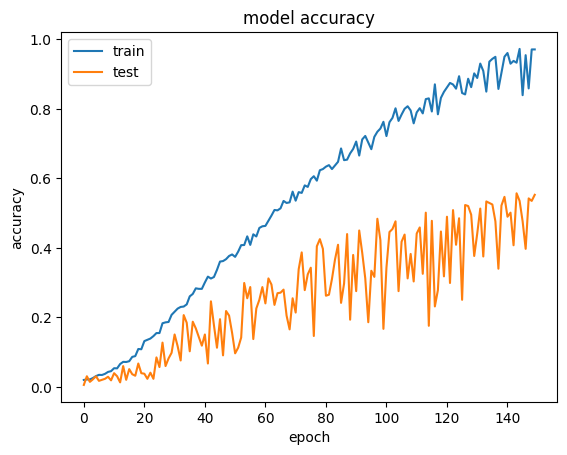

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

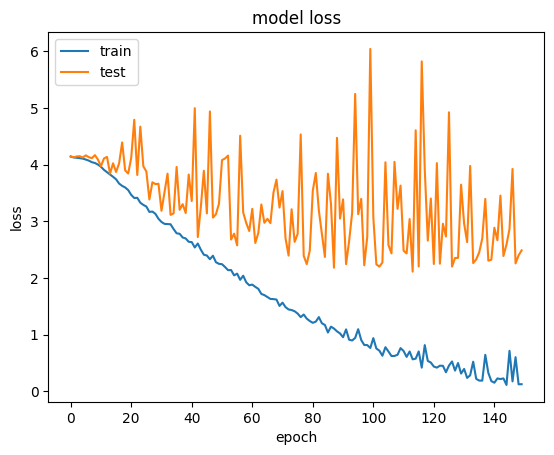

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')